## Setup

Here are the imports for data manipulation and plotting

In [1]:
# import warnings
# warnings.filterwarnings('ignore')
# %load_ext rpy2.ipython

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# %%R 
# require(ggplot2)
# require(dplyr)

## Read in data

Here we read in the data from csv and drop some unnecessary columns

In [4]:
# read in the csv from process_data folder
mice = pd.read_csv("../process_data/aggregate_results.csv")

# reorder deatil columns to be at the front
column_order = mice.columns.tolist()
column_order = column_order[20:26] + column_order[:20] + column_order[26:]
mice = mice[column_order]

# drop unnecessary columns
mice = mice.drop(['Unnamed: 0', 'inner_directory', 'mouse_details_EPM'], axis = 1)

In [5]:
mice.head()

,mouse_details_date,mouse_details_mouseID,mouse_details_sex,mouse_details_strain,mouse_details_time,frac_in_arms_frac_in_closedAndMiddle,frac_in_arms_frac_in_closedArms,frac_in_arms_frac_in_middle,frac_in_arms_frac_in_openArms,frames_in_arms_CL,...,total_smoothed_distance_F2,total_smoothed_distance_F3,total_smoothed_distance_F4,total_smoothed_distance_M,total_smoothed_distance_OB,total_smoothed_distance_OT,turning_preferences_num_back,turning_preferences_num_left,turning_preferences_num_right,turning_preferences_num_straight
0,20121116.0,734,M,BW,161742.0,0.798347,0.690140,0.108207,0.166115,3285.0,...,0.000000,0.000000,0.000000,1416.961354,1662.148914,444.632595,20.0,17.0,12.0,18.0
1,20121116.0,735,M,BW,163845.0,0.889956,0.798252,0.091704,0.070354,2759.0,...,0.000000,0.000000,3.059099,1143.033607,198.175354,341.932243,7.0,8.0,11.0,13.0
2,20121121.0,767,F,BWPOF2,151056.0,0.868211,0.805746,0.062465,0.074684,2602.0,...,88.700511,11.967688,1.181817,795.871676,381.803654,265.161401,13.0,7.0,1.0,18.0
3,20121121.0,770,F,BWPOF2,152045.0,0.766952,0.638330,0.128622,0.202515,2482.0,...,0.000000,0.000000,7.267073,2043.835650,1223.237047,1231.555084,24.0,21.0,22.0,11.0
4,20121121.0,761,F,PO,153325.0,0.735124,0.634772,0.100351,0.232236,3274.0,...,0.000000,0.000000,0.000000,917.001281,874.636831,1142.467513,16.0,14.0,11.0,4.0


# Clean up columns

## Look at strain options

In [6]:
mice.mouse_details_strain.unique()

array(['BW', 'BWPOF2', 'PO', 'BWPOF1', nan, '15.054011413852756',
       '34.006724464734965', '11.082004050179675', '24.94923814799547'],
      dtype=object)

In [7]:
mice['mouse_details_strain'].value_counts()

BWPOF2                1014
PO                      65
BW                      57
BWPOF1                  45
11.082004050179675       1
15.054011413852756       1
24.94923814799547        1
34.006724464734965       1
Name: mouse_details_strain, dtype: int64

In [8]:
# drop rows where strain is not formatted
strains = ['BW', 'PO', 'BWPOF1', 'BWPOF2']
mice = mice[mice['mouse_details_strain'].isin(strains)]

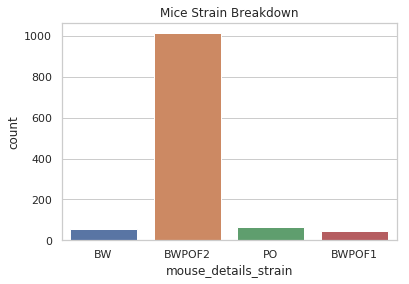

In [9]:
sns.set(style="whitegrid")
strain = sns.countplot(x="mouse_details_strain", data=mice).set_title("Mice Strain Breakdown")

In [10]:
mice.shape

(1181, 63)

## Look at sex options

In [11]:
mice['mouse_details_sex'].value_counts()

M         616
F         557
360         2
339         2
M-with      2
357         1
pups        1
Name: mouse_details_sex, dtype: int64

In [12]:
# drop rows where sex is not formatted
sexes = ['M', 'F']
mice = mice[mice['mouse_details_sex'].isin(sexes)]

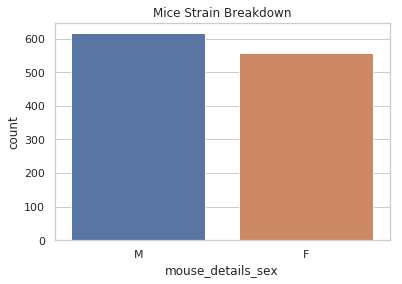

In [13]:
sex = sns.countplot(x="mouse_details_sex", data=mice).set_title("Mice Strain Breakdown")

In [14]:
mice.shape

(1173, 63)

### Summary Stats

In [15]:
mice.shape

(1173, 63)

In [16]:
mice.columns

Index(['mouse_details_date', 'mouse_details_mouseID', 'mouse_details_sex',
       'mouse_details_strain', 'mouse_details_time',
       'frac_in_arms_frac_in_closedAndMiddle',
       'frac_in_arms_frac_in_closedArms', 'frac_in_arms_frac_in_middle',
       'frac_in_arms_frac_in_openArms', 'frames_in_arms_CL',
       'frames_in_arms_CR', 'frames_in_arms_M', 'frames_in_arms_OB',
       'frames_in_arms_OT', 'median_speed_CL', 'median_speed_CR',
       'median_speed_F1', 'median_speed_F2', 'median_speed_F3',
       'median_speed_F4', 'median_speed_M', 'median_speed_OB',
       'median_speed_OT', 'smoothed_median_speed_CL',
       'smoothed_median_speed_CR', 'smoothed_median_speed_F1',
       'smoothed_median_speed_F2', 'smoothed_median_speed_F3',
       'smoothed_median_speed_F4', 'smoothed_median_speed_M',
       'smoothed_median_speed_OB', 'smoothed_median_speed_OT',
       'tot_arm_entries_CL', 'tot_arm_entries_CR', 'tot_arm_entries_F1',
       'tot_arm_entries_F2', 'tot_arm_entries_F3', 

In [17]:
# open and closed arms across sex and strain
mice.groupby(['mouse_details_strain', 'mouse_details_sex'])['frac_in_arms_frac_in_openArms', 'frac_in_arms_frac_in_closedArms'].mean()

frac_in_arms_frac_in_openArms  \
mouse_details_strain mouse_details_sex                                  
BW                   F                                       0.082912   
                     M                                       0.053162   
BWPOF1               F                                       0.126167   
                     M                                       0.113066   
BWPOF2               F                                       0.136872   
                     M                                       0.147318   
PO                   F                                       0.245057   
                     M                                       0.193822   

                                        frac_in_arms_frac_in_closedArms  
mouse_details_strain mouse_details_sex                                   
BW                   F                                         0.816796  
                     M                                         0.861078  
BWPOF1               F                                         0.768384  
                     M                                         0.787358  
BWPOF2               F                                         0.751790  
                     M                                         0.735631  
PO                   F                                         0.606929  
                     M                                         0.676306

# Plot features

- Here we create a function to plot the desired feature by strain and sex. 
- Just looking at the pure species here (can be changed by adding hybrids to "order" parameter).
- We want to see if any of the features do a good job at distingishing the two strains

In [18]:
def plot_feature(feature):
    # feature: string
    plt.figure()
    ax = sns.catplot('mouse_details_strain', feature, data = mice,
                     kind = "violin", order = ['PO','BW'], 
                     hue = 'mouse_details_sex')
    ax = ax.fig.suptitle(feature)

### Open and Closed Arm Fractions

As expected, the fraction of time in closed versus open is very good at distinguishing the species

<Figure size 432x288 with 0 Axes>

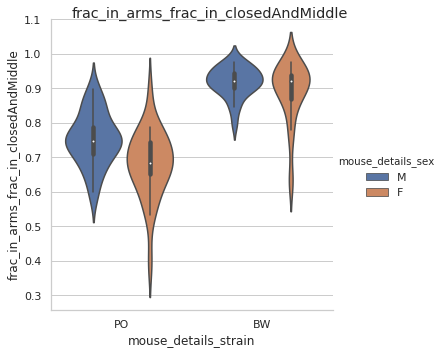

<Figure size 432x288 with 0 Axes>

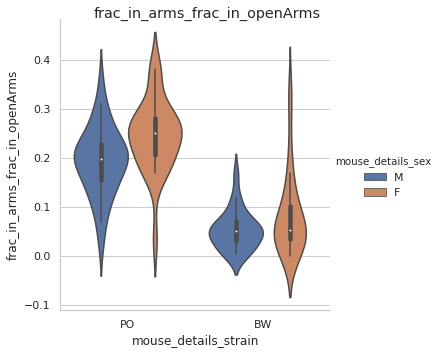

In [25]:
plot_feature('frac_in_arms_frac_in_closedAndMiddle')
plot_feature('frac_in_arms_frac_in_openArms')

### Total Distance

The total distance works for some arms but not others

In [20]:
feature_list = mice.columns.tolist()
feature_list = feature_list[-22:-13]
feature_list

['total_distance_CL',
 'total_distance_CR',
 'total_distance_F1',
 'total_distance_F2',
 'total_distance_F3',
 'total_distance_F4',
 'total_distance_M',
 'total_distance_OB',
 'total_distance_OT']

<Figure size 432x288 with 0 Axes>

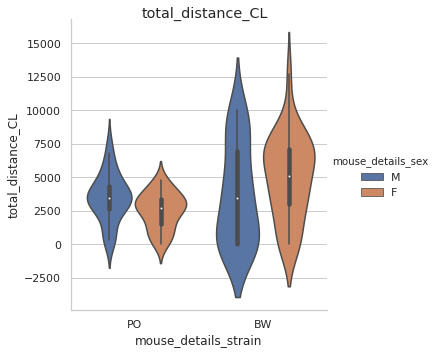

<Figure size 432x288 with 0 Axes>

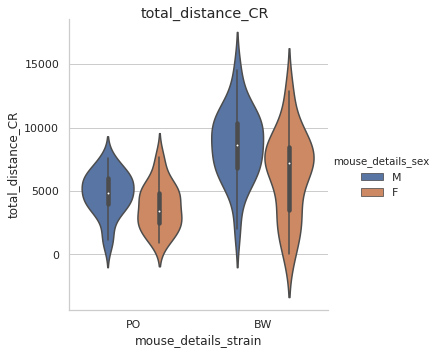

<Figure size 432x288 with 0 Axes>

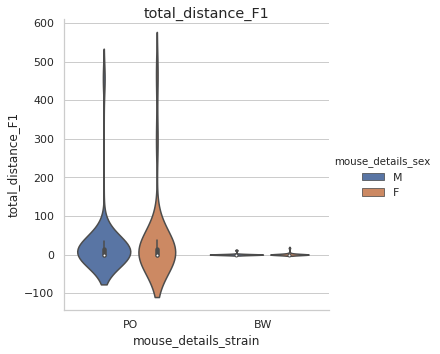

<Figure size 432x288 with 0 Axes>

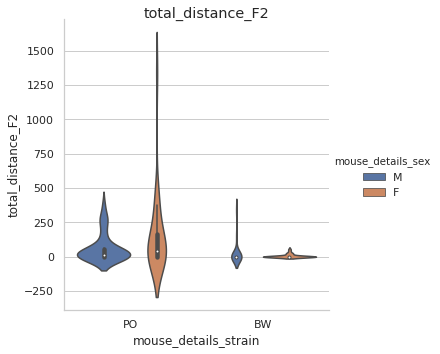

<Figure size 432x288 with 0 Axes>

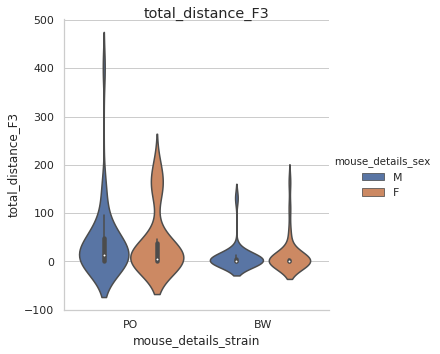

<Figure size 432x288 with 0 Axes>

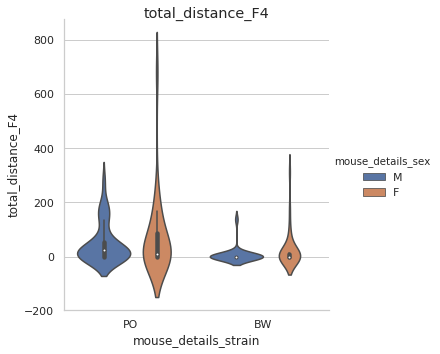

<Figure size 432x288 with 0 Axes>

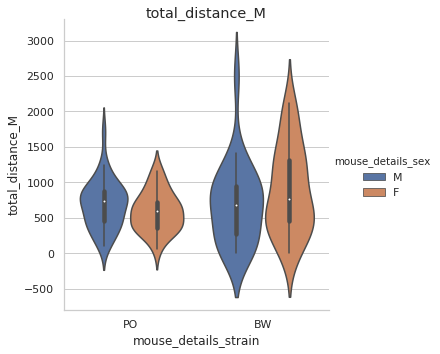

<Figure size 432x288 with 0 Axes>

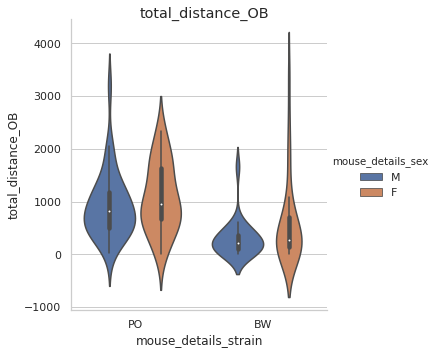

<Figure size 432x288 with 0 Axes>

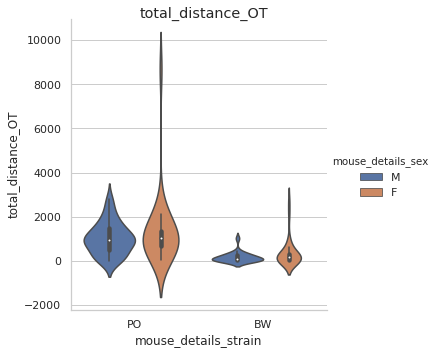

In [21]:
for i, item in enumerate(feature_list):
    plot_feature(item)

### Turn Preference

- turning preference also shows some promise

In [22]:
feature_list = mice.columns.tolist()
feature_list = feature_list[-4:]
feature_list

['turning_preferences_num_back',
 'turning_preferences_num_left',
 'turning_preferences_num_right',
 'turning_preferences_num_straight']

<Figure size 432x288 with 0 Axes>

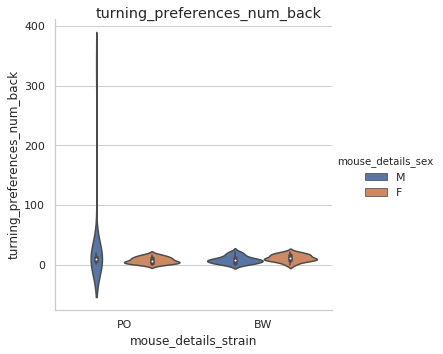

<Figure size 432x288 with 0 Axes>

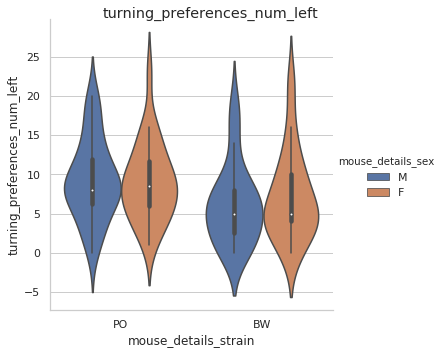

<Figure size 432x288 with 0 Axes>

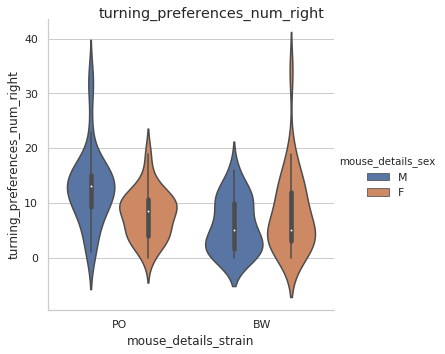

<Figure size 432x288 with 0 Axes>

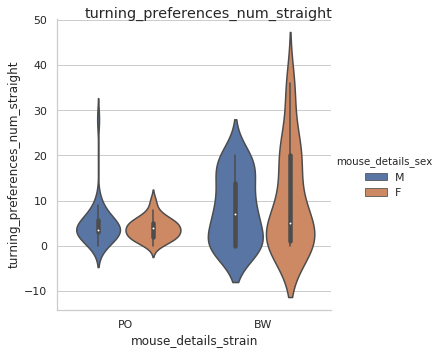

In [23]:
for i, item in enumerate(feature_list):
    plot_feature(item)

### Speed

In [28]:
# median speed
feature_list = mice.columns.tolist()
feature_list = feature_list[24:32]
feature_list

['smoothed_median_speed_CR',
 'smoothed_median_speed_F1',
 'smoothed_median_speed_F2',
 'smoothed_median_speed_F3',
 'smoothed_median_speed_F4',
 'smoothed_median_speed_M',
 'smoothed_median_speed_OB',
 'smoothed_median_speed_OT']

<Figure size 432x288 with 0 Axes>

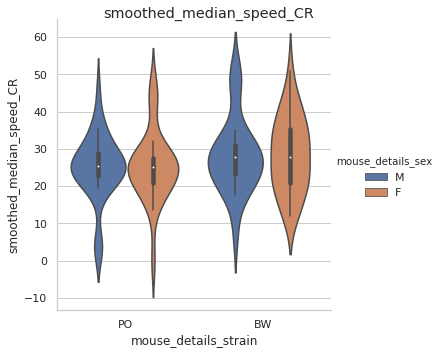

<Figure size 432x288 with 0 Axes>

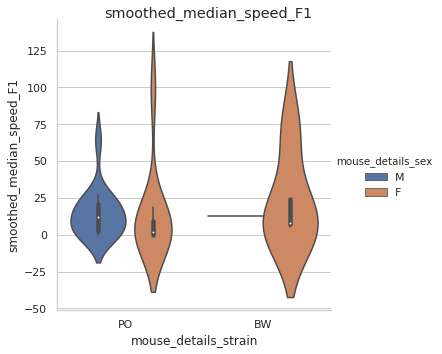

<Figure size 432x288 with 0 Axes>

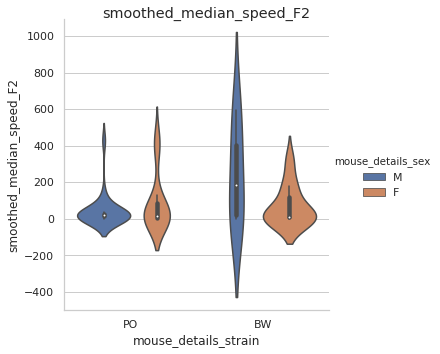

<Figure size 432x288 with 0 Axes>

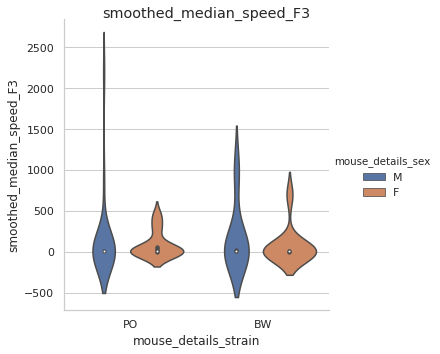

<Figure size 432x288 with 0 Axes>

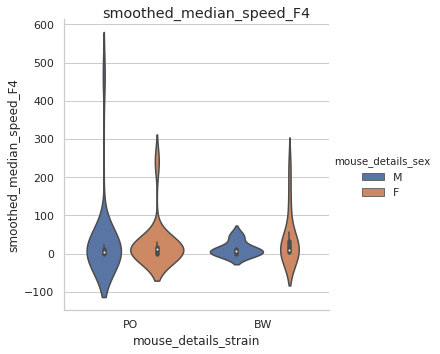

<Figure size 432x288 with 0 Axes>

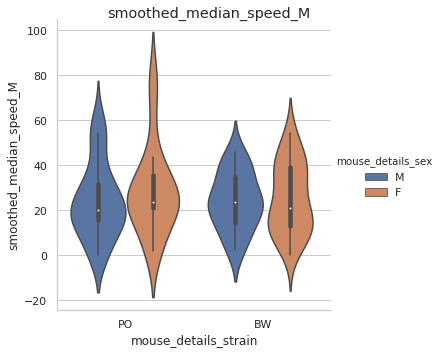

<Figure size 432x288 with 0 Axes>

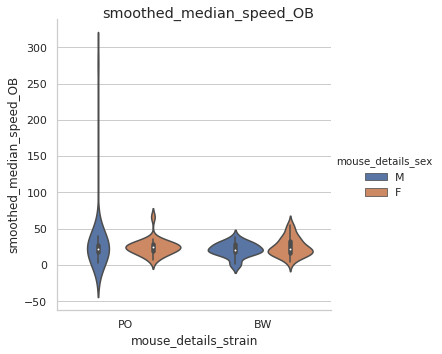

<Figure size 432x288 with 0 Axes>

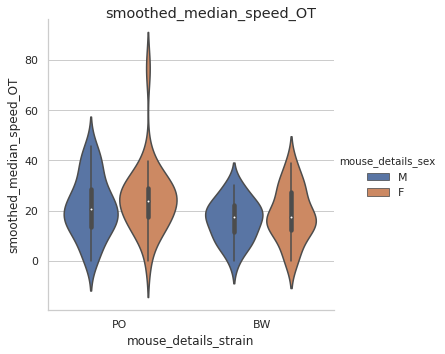

In [26]:
for i, item in enumerate(feature_list):
    plot_feature(item)

# old Stuff

In [ ]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

# feature_names = ['frac_in_arms_frac_in_openArms', 'frac_in_arms_frac_in_closedArms']
feature_names = ['frac_in_arms_frac_in_openArms', 'frac_in_arms_frac_in_closedArms',
                "total_smoothed_distance_M", "total_smoothed_distance_OB", "total_smoothed_distance_OT", 
                 "total_smoothed_distance_CL", "total_smoothed_distance_CR"]
X = mice[feature_names]
y = mice['strain']
y_chart = pd.factorize(mice['strain'])[0]
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y_chart, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.show()

### Modeling

In [ ]:
# feature_names = ['frac_in_arms_frac_in_openArms', 'frac_in_arms_frac_in_closedArms']
feature_names = ['frac_in_arms_frac_in_openArms', 'frac_in_arms_frac_in_closedArms',
                "total_smoothed_distance_M", "total_smoothed_distance_OB", "total_smoothed_distance_OT", 
                 "total_smoothed_distance_CL", "total_smoothed_distance_CR"]


X = mice[feature_names]
y = mice['strain']
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(log_reg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(log_reg.score(X_test, y_test)))

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(decision_tree.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(decision_tree.score(X_test, y_test)))

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = log_reg.predict(X_test)
print("Logistic Regression")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))